In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 42 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (3,909 kB/s)
debconf: unable to initi

In [ ]:
pip install --ignore-installed Pillow==9.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.3 MB 5.0 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
from google.colab import files
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pytesseract
from pytesseract import Output
import cv2

In [ ]:
uploaded = files.upload()

Saving 2.jpg to 2.jpg


In [ ]:
path = "/content/34.jpg"

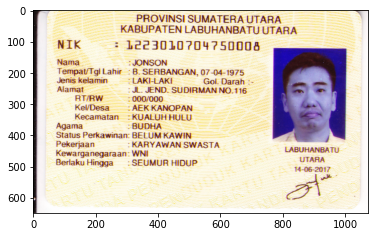

In [ ]:
#https://stackoverflow.com/questions/32302180/typeerror-image-data-can-not-convert-to-float
image = cv2.imread(path)
plt.imshow(image)

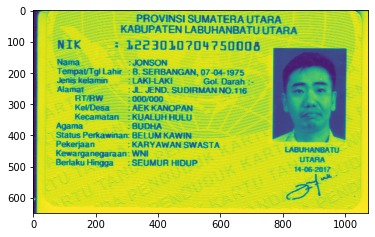

In [ ]:
image2 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image2)

In [ ]:
ret,thresh3 = cv2.threshold(image2,127,255,cv2.THRESH_TRUNC)

In [ ]:
data = pytesseract.image_to_data(thresh3, output_type='data.frame')
data

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,0,0,0,0,0,0,1074,649,-1,NaN
1,2,1,1,0,0,0,283,15,562,63,-1,NaN
2,3,1,1,1,0,0,283,15,562,63,-1,NaN
3,4,1,1,1,1,0,333,15,461,28,-1,NaN
4,5,1,1,1,1,1,333,15,152,25,83,PROVINSI
...,...,...,...,...,...,...,...,...,...,...,...,...
72,5,1,3,1,2,4,445,479,81,21,84,HIDUP
73,2,1,4,0,0,0,766,118,242,492,-1,NaN
74,3,1,4,1,0,0,766,118,242,492,-1,NaN
75,4,1,4,1,1,0,766,118,242,492,-1,NaN


In [ ]:
data[['conf','text']]

,conf,text
0,-1,NaN
1,-1,NaN
2,-1,NaN
3,-1,NaN
4,83,PROVINSI
...,...,...
72,84,HIDUP
73,-1,NaN
74,-1,NaN
75,-1,NaN


In [ ]:
for i in range(len(data)):
  if data["conf"][i] == -1:
    print(data['text'][i])

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


In [ ]:
data.conf.unique()

array([-1, 83, 90, 91, 88, 80, 89, 76, 95, 96, 12, 51, 71, 93, 75, 78, 31,
       82, 73, 86, 85, 28, 77,  3, 70, 94, 38, 92, 66, 39, 59, 46, 84])

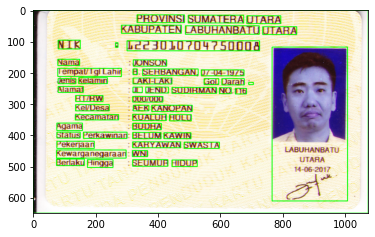

In [ ]:
for box in range(len(data)):
  if data["conf"][box] >= 0:
    image = cv2.rectangle(image, (data['left'][box], data['top'][box]), 
                          (data['left'][box]+data['width'][box], data['top'][box]+data['height'][box]), 
                          (0,255,0),2)

plt.imshow(image)

In [ ]:
result = pytesseract.image_to_string(thresh3)
print(result)

PROVINSI SUMATERA UTARA
KABUPATEN LABUHANBATU UTARA

NIk > b223010704750008
Nama JONSON
TempatTgilany 8. SERBANGAN, 07-04-1975
Jens kelamin LAKELLAKi Goi. Darah :-
Aiamat JL. JEND. SUDIRMAN NO 116
RERW 960/000
Kel/Desa AEK KANOPAN
Kecamatan © KUALUH HULU
Agama BUDHA
Status Perkawinan: BELUM KAWIN
Pekerjaan KARYAWAN SWASTA

Kewarganegaraan WNi
Beriaku Hingga SEUMUR HIDUP

 

